In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
def clamp(n, smallest, largest): return max(smallest, min(n, largest))

def random_walk(baseDist):
    res = baseDist/10.0
    return 1.0 - clamp((res*res), 0.25, 1.0)

def attack(baseDist, enemyDist):
    return clamp(math.exp(enemyDist/10.) - 2.0, 0.25, 1.0)

def move_to_base(enemyDist, baseDist):
    return 0.35


ENEMY_DIST = np.arange(0, 20, 0.25)
BASE_DIST = np.arange(0, 20, 0.25)
ALLY_DIST = np.arange(0, 20, 0.25)

img = np.zeros((ENEMY_DIST.shape[0], BASE_DIST.shape[0], ALLY_DIST.shape[0]))
ht = np.zeros((3, ENEMY_DIST.shape[0], BASE_DIST.shape[0], ALLY_DIST.shape[0]))
# TODO: Vectorize
for x, ed in enumerate(ENEMY_DIST):
    for y, bd in enumerate(BASE_DIST):
        for z, ad in enumerate(ALLY_DIST):
            utility = np.array([random_walk(bd), attack(bd, ed), move_to_base(ed, bd)])
            for i in range(utility.shape[0]):
                ht[i][x][y][z] = utility[i]
            img[x][y][z] = np.argmax(utility)

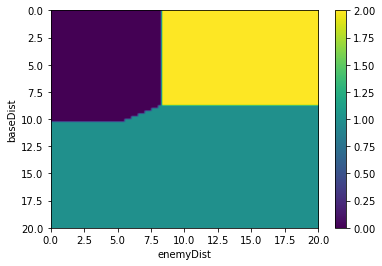

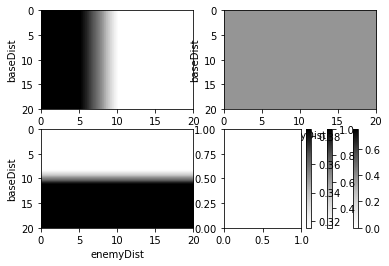

In [23]:
imgCut = img[:, :, 79]
htCut = ht[:, :, :, 79]

fig, ax = plt.subplots()
im = ax.imshow(imgCut, extent=[0, 20, 20, 0])
ax.set_aspect('auto')
ax.set_xlabel('enemyDist')
ax.set_ylabel('baseDist')


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(3):
    im = ax[i % 2, i // 2].imshow(htCut[i], extent=[0, 20, 20, 0], cmap='Greys')
    ax[i % 2, i // 2].set_aspect('auto')
    ax[i % 2, i // 2].set_xlabel('enemyDist')
    ax[i % 2, i // 2].set_ylabel('baseDist')
    plt.colorbar(im)